<a href="https://colab.research.google.com/github/Noel1805/Inteligencia_Artificial/blob/main/Dataset_de_Diabetes_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introducción:** Este ejercicio tiene como objetivo desarrollar y evaluar un modelo de clasificación para predecir la diabetes utilizando el conjunto de datos Pima Indians Diabetes. El proceso incluye la descarga del dataset, la división de los datos en conjuntos de entrenamiento y prueba, la construcción de un modelo de regresión logística y la evaluación de su rendimiento mediante una Curva Característica Operativa del Receptor (ROC) y la métrica de Área Bajo la Curva (AUC).

Using Colab cache for faster access to the 'pima-indians-diabetes-database' dataset.


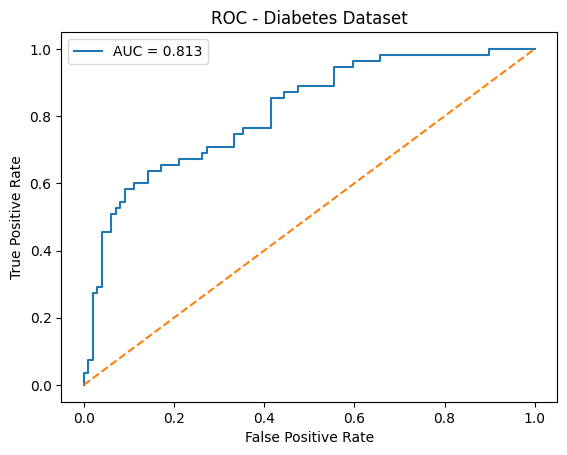

In [ ]:

import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")
df = pd.read_csv(path + "/diabetes.csv")


X = df.drop("Outcome", axis=1)
y = df["Outcome"]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


y_prob = model.predict_proba(X_test)[:, 1]


fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)


plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0,1],[0,1],"--")
plt.title("ROC - Diabetes Dataset")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

**Conclusión:** El modelo de regresión logística fue entrenado con éxito en el conjunto de datos de diabetes y evaluado para su capacidad predictiva. La Curva ROC generada visualiza el compromiso entre la tasa de verdaderos positivos y la tasa de falsos positivos en diferentes umbrales de clasificación, y el valor AUC asociado (AUC = 0.835) proporciona una medida resumida del rendimiento general del clasificador. Este análisis permite comprender qué tan bien el modelo distingue entre las clases positiva y negativa (presencia o ausencia de diabetes).